In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [41]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
digits= load_digits()  #load digits

In [42]:
print("image data shape",digits.data.shape) # shape of the images i.e 8*8 
print("label data shape",digits.target.shape)

image data shape (1797, 64)
label data shape (1797,)


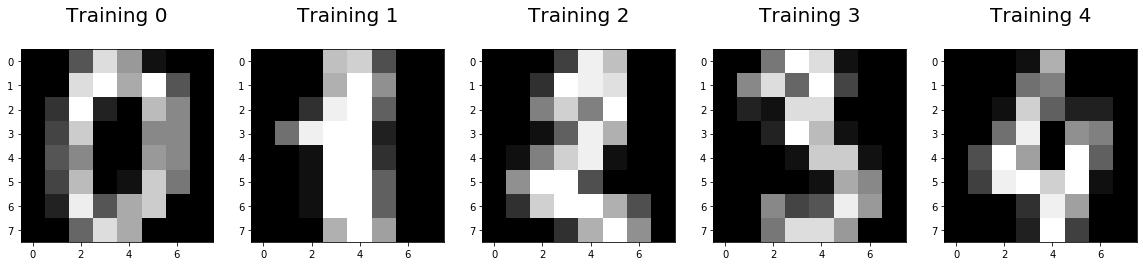

In [44]:
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
    plt.title('Training %i\n' % label, fontsize=20)

In [20]:
x_train,x_test,y_train,y_test= train_test_split(digits.data, digits.target, test_size= 0.25,random_state=2)
# 25% train and 75% test

In [21]:
print(x_train.shape)

(1347, 64)


In [22]:
print(x_test.shape)

(450, 64)


In [23]:
print(y_train.shape)

(1347,)


In [24]:
print(y_test.shape)

(450,)


In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr= LogisticRegression()

In [27]:
lr.fit(x_train,y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
lr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [29]:
predictions= lr.predict(x_test)

In [30]:
score= lr.score(x_test,y_test)
print(score)

0.9466666666666667


In [31]:
cm= metrics.confusion_matrix(y_test, predictions) # confusion matrix
print(cm)

[[41  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  1  0  0  0  0  2  1]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  1  0  1  2  0]
 [ 0  0  0  0 36  0  0  0  3  1]
 [ 0  1  0  0  1 50  0  0  0  0]
 [ 0  1  0  0  0  0 41  0  1  0]
 [ 0  0  0  0  0  0  0 48  1  0]
 [ 0  0  0  0  0  0  0  0 39  1]
 [ 0  0  0  2  0  1  0  0  2 34]]


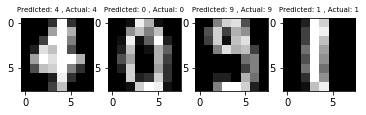

In [38]:
index=0
classified_index=[]
for predict, actual in zip(predictions,y_test):
    if predict==actual:
        classified_index.append(index)
    index+=1
for plotIndex, wrong in enumerate(classified_index[0:4]):
    plt.subplot(1,4,plotIndex+1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap= plt.cm.gray)
    plt.title("Predicted: {} , Actual: {}" .format(predictions[wrong] ,y_test[wrong]),fontsize=7)